# Analyse pixelated potential reconstructions

__last update__: 29/11/21

In [1]:
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
from astropy.io import fits
import corner
import seaborn as sns # for nicer colors on the plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('image', interpolation='none')

from herculens.Coordinates.pixel_grid import PixelGrid

In [2]:
SAVE_FIGURES = False

# Factor of pixel scale for the potential grid
potential_pixel_scale = 4

# What results (stored in fits files) do consider
choices = [
    #('dark halo', f'pixpot-dark_halo-scale_{potential_pixel_scale}-smooth_source.fits'),
    #('GRF', f'pixpot-GRF-scale_{potential_pixel_scale}-smooth_source.fits'),
    ('discyness', f'pixpot-discyness-scale_{potential_pixel_scale}-smooth_source.fits'),
]

In [3]:
npix = 100
pix_scl = 0.08  # arcsec / pixel
half_size = npix * pix_scl / 2
ra_at_xy_0 = dec_at_xy_0 = -half_size + pix_scl / 2
transform_pix2angle = pix_scl * np.eye(2)
grid = PixelGrid(nx=npix, ny=npix, ra_at_xy_0=ra_at_xy_0, dec_at_xy_0=dec_at_xy_0,
                 transform_pix2angle=transform_pix2angle)

x_grid, y_grid = grid.pixel_coordinates

grid.create_model_grid(pixel_scale_factor=potential_pixel_scale, 
                       conserve_extent=True, name='fit')
x_grid_fit, y_grid_fit = grid.model_pixel_coordinates('fit')
pix_scl_fit = pix_scl * potential_pixel_scale

extent = grid.extent

In [4]:
def get_maps(choice_list):
    array_list = []
    for choice in choice_list:
        res_label, filename = choice
        with fits.open(os.path.join('results', filename)) as hdus:
            pixpot_model = hdus[0].data.astype(float)
            pixpot_truth_highres = hdus[1].data.astype(float)
            pixpot_truth_fitgrid = hdus[2].data.astype(float)
            mask_fitgrid = hdus[3].data.astype(float)
        array_list.append([pixpot_model, pixpot_truth_fitgrid, 
                           pixpot_truth_highres, mask_fitgrid])
    return array_list

In [5]:
arrays = get_maps(choices)

In [6]:
np.fft.fftshift(np.fft.fftfreq(len(x_grid_fit), grid.pixel_width))[len(x_grid_fit)//2:].shape
#print(np.fft.fftshift(np.fft.fftfreq(len(x_grid), grid.pixel_width))[len(x_grid)//2:].shape)

(13,)

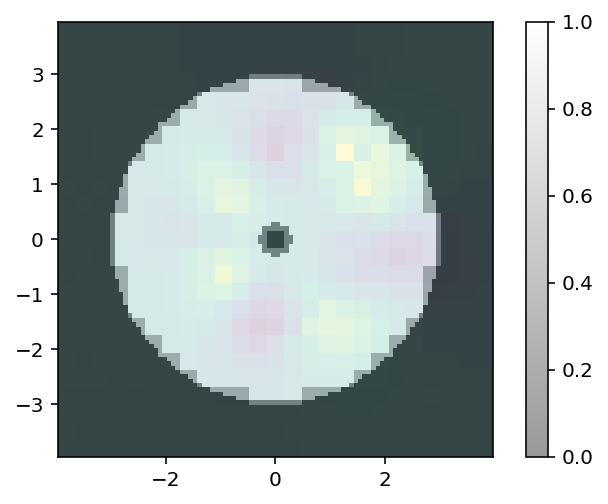

In [7]:
def annulus_mask(xx, yy, rmin, rmax):
    radius = np.hypot(xx, yy)
    mask = ((radius >= rmin) & (radius <= rmax)).astype(bool)
    return mask

r_min = 0.3
r_max = 3
mask_fit = annulus_mask(x_grid_fit, y_grid_fit, r_min, r_max)
mask = annulus_mask(x_grid, y_grid, r_min, r_max)

plt.imshow(arrays[0][0], origin='lower', extent=extent, alpha=0.5)
plt.imshow(mask_fit, origin='lower', extent=extent, alpha=0.4, cmap='gray')
plt.imshow(mask, origin='lower', extent=extent, alpha=0.4, cmap='gray')
plt.colorbar()
plt.show()

In [20]:
def power_spectrum(xx, yy, pix_scl, image, mask_image=None):
    #from lenstronomy.Util import analysis_util as autil
    if mask_image is None:
        mask_image = np.ones_like(image)
        
    # squared magnitude of FFT
    fft_abs2 = np.abs(np.fft.fft2(image * mask_image))**2
    
    # shift FFT image so that small wave numbers are at the center
    fft_abs2 = np.fft.fftshift(fft_abs2)
    
    # get radial bins
    npix_x = len(xx)  # assumes square images
    npix_y = len(yy)  # assumes square images
    k_x = np.fft.fftshift(np.fft.fftfreq(npix_x, pix_scl))[npix_x//2:]
    k_y = np.fft.fftshift(np.fft.fftfreq(npix_y, pix_scl))[npix_y//2:]
    k_bins = k_x[1:] - k_x[:-1]
    
    for i in range()
    
    # TEMP
    i_sorted = fft_abs2.flatten()
    rind = np.where(k_bins)[0]
    csim = np.cumsum(i_sorted, dtype=float)
    tbin = csim[rind[1:]] - csim[rind[:-1]]
    r_bin = np.linspace(start=1, stop=len(tbin) + 1 - 0.5, num=len(tbin))
    radial_prof = tbin / len(rind)
    print(radial_prof.shape, r_bin.shape, k_bins.shape)
    
    #print(k_x.shape, np.where(k_x[1:] - k_x[:-1])[0])
    #return
    ##k_x_bins = k_x[1:] - k_x[:-1]
    ##k_y_bins = k_y[1:] - k_y[:-1]
    #k_xx, k_yy = np.meshgrid(k_x, k_y)
    #k_xx_f = k_xx.flatten()
    #k_yy_f = k_yy.flatten()
    #k = np.hypot(k_xx_f, k_yy_f)
    #print(k_xx.shape, image.shape)
    #k_bins = k[1:] - k[:-1]
    #fft_abs2_f = fft_abs2.flatten()
    #for i in k_bins:
    #    in_annulus = []
    #    for j in range(fft_abs2_f.size):
    #        if k_bins[i] < k[j] < k_bins[i+1]:
    #            in_annulus.append(fft_abs2_f[i])
    
    #power_spectrum, radii = autil.azimuthalAverage(fft_abs2)
    #power_spectrum /= np.sum(mask_image)
    #return radii, power_spectrum

power_spectrum(x_grid_fit, y_grid_fit, pix_scl_fit, arrays[0][0])

#plt.figure()
#plt.imshow(power_spectrum(arrays[0][1])[1], origin='lower')
#plt.show()

(11,) (11,) (12,)


In [8]:
raise

(169,) (25, 25)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
plt.figure()
#plt.ylim(1e-4, 1e3)
plt.loglog(*power_spectrum(arrays[0][0]), label="model",
           color='tab:blue', linestyle='-')
plt.loglog(*power_spectrum(arrays[0][0], mask_image=mask_fit), label="model (masked)",
           color='tab:blue', linestyle='--')
plt.loglog(*power_spectrum(arrays[0][1]), label="truth (fit-grid)",
           color='tab:orange', linestyle='-')
plt.loglog(*power_spectrum(arrays[0][1], mask_image=mask_fit), label="truth (masked)",
           color='tab:orange', linestyle='--')
plt.loglog(*power_spectrum(arrays[0][2]), label="truth (high-res)",
           color='tab:red', linestyle='-')
plt.loglog(*power_spectrum(arrays[0][2], mask_image=mask), label="truth (high-res, masked)",
           color='tab:red', linestyle='--')
plt.legend(fontsize=14, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()